<a href="https://colab.research.google.com/github/LMAPcoder/Machine-Learning-Lab/blob/main/Exercise_sheet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Programming Machine Learning**

## Exercise Sheet 5

### Exercise 1: Backward search for variable selection

In [ ]:
#Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Uploading the file from Google drive
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1rI6ITV769Yekyy8Lj7k0BECI5UExd_LS' -O bank.csv

In [ ]:
bank = pd.read_csv('bank.csv',sep=';')

Exploration of the data

In [ ]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
bank['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

Normalization of the data

Normalization is required when features have different ranges. For example, in this data set the numeric features age, balance, duration, etc. have differente scales. The large attributes can intrinsically influence more the result of our training algorithm due to their larger value.

There are several methods to normalize the data. Some of them are:


*   Scaling to a range: converts floating-point feature values from their natural range into a standard range—usually 0 and 1.
*   Clipping: caps all feature values above (or below) a certain value to fixed value
*   Log scaling: computes the log of your values to compress a wide range to a narrow range
*   Z-score: represents the number of standard deviations away from the mean.

In this lab, we will use Z-score.


In [ ]:
def normalizer(df):
  df_n = pd.DataFrame(columns=df.columns,index=df.index)
  for c in df.columns:
    if pd.api.types.is_numeric_dtype(df[c].dtype):
      mu = df[c].mean()
      sigma = df[c].std()
      df_n[c] = df[c].astype(float)
      for i in range(len(df[c])):
        df_n.at[i,c] = (df.at[i,c] - mu)/sigma
    else:
      df_n[c] = df[c]
  return df_n

In [ ]:
bank_normalized = normalizer(bank)
bank_normalized.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-1.056153,unemployed,married,primary,no,0.121058,no,no,cellular,0.374011,oct,-0.711782,-0.576766,-0.407173,-0.320377,unknown,no
1,-0.772497,services,married,secondary,no,1.118521,yes,yes,cellular,-0.595961,may,-0.169175,-0.576766,2.988713,2.041508,failure,no
2,-0.583394,management,single,tertiary,no,-0.024142,yes,no,cellular,0.010271,apr,-0.303865,-0.576766,2.898822,0.270094,failure,no
3,-1.056153,management,married,tertiary,no,0.017724,yes,yes,unknown,-1.565932,jun,-0.249989,0.387925,-0.407173,-0.320377,unknown,no
4,1.685850,blue-collar,married,secondary,no,-0.472701,yes,no,unknown,-1.323439,may,-0.146086,-0.576766,-0.407173,-0.320377,unknown,no


Convertion of non-numeric values

In [ ]:
bank_normalized['y'] = bank_normalized['y'].astype('category').cat.codes

In [ ]:
bank_dumm = pd.get_dummies(bank_normalized)

Drop out the rows with missing values or NA

In [ ]:
bank_dumm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4521 non-null   float64
 1   balance              4521 non-null   float64
 2   day                  4521 non-null   float64
 3   duration             4521 non-null   float64
 4   campaign             4521 non-null   float64
 5   pdays                4521 non-null   float64
 6   previous             4521 non-null   float64
 7   y                    4521 non-null   int8   
 8   job_admin.           4521 non-null   uint8  
 9   job_blue-collar      4521 non-null   uint8  
 10  job_entrepreneur     4521 non-null   uint8  
 11  job_housemaid        4521 non-null   uint8  
 12  job_management       4521 non-null   uint8  
 13  job_retired          4521 non-null   uint8  
 14  job_self-employed    4521 non-null   uint8  
 15  job_services         4521 non-null   u

There are no missing values or NA

Split of the data set

In [ ]:
np.random.seed(3116) #to set the pseudo ramdom number generator
ratio = 0.8 #percentage of the data used for training the model
N, M = bank_dumm.shape
   #to assure a uniform distribution of the instances in both the training and the data sets
split = int(N*ratio)
data_train = bank_dumm.iloc[ridx[:split]]
data_test = bank_dumm.iloc[ridx[split:]]

print(data_train['y'].value_counts())
print(data_test['y'].value_counts())

output = 'y'
X_train = data_train.drop(output,axis=1).to_numpy()
y_train = data_train[output].to_numpy().reshape(-1,1)
X_test = data_test.drop(output,axis=1).to_numpy()
y_test = data_test[output].to_numpy().reshape(-1,1)
print(X_train.shape)
print(X_test.shape)

0    3196
1     420
Name: y, dtype: int64
0    804
1    101
Name: y, dtype: int64
(3616, 51)
(905, 51)


Logistic regression

Logistic regression is a method to solve binary classification problems thorugh linear regression.

Predicted output:
\begin{align}
p(y=1|\mathbf{x},\boldsymbol{\theta}) = \sigma (x^T \theta) = \frac{e^{x^T \theta}}{1+e^{x^T \theta}}
\end{align}
L2-Regularized objective function:
\begin{align}
L_{cll}(\theta) = \log \prod_{n=1}^{N} p(y_n|x_n,\theta) - \lambda ||\theta||_2^2 = \sum y log(p)+(1-y)log(1-p) - \lambda ||\theta||_2^2
\end{align}
Gradient
\begin{align}
\nabla L_{cll} (\theta) = \sum_{n=1}^{N} x_n (y_n - \frac{e^{x_n^T \theta}}{1+e^{x_n^T \theta}}) - 2 \lambda \theta = X^T (y-p) - 2 \lambda \theta
\end{align}
Iterative step

$\text{For k=1,2,...,K }$

>$\text{For c=1,2,...,C }$

>>$\theta^{(k,c)} = \theta^{(k,c-1)} + \alpha \nabla L_{cll}(\theta^{(k,c-1)})$


In [ ]:
#Gradient ascent function
def GAoptimizer(X_tr,y_tr,bz,lr,lamda,k_max,stepcontroller):
  N, M = X_tr.shape
  theta = np.zeros((M,1)) #initial theta
  Logl = np.zeros(k_max)
  for k in range(k_max):
    for c in range(int(np.ceil(N/bz))):
      g = gradient(X_tr[bz*(c-1):bz*c],y_tr[bz*(c-1):bz*c],theta,lamda) #gradient
      sd =  g #search direction
      theta += lr * sd

      if stepcontroller == 'bd':
        lr = Bd(lr,X_tr,y_tr,theta,lamda)
      elif stepcontroller == 'bt':
        lr = Bt(lr,X_tr,y_tr,theta,lamda)

    Logl[k] = Lcll(X_tr,y_tr,theta,lamda)
  return theta,Logl

In [ ]:
#Auxiliry funtions
#Probability p(y=1) calculator
p = lambda X,theta: (1/(1+np.exp(-X@theta))).reshape(-1,1)
# p = lambda X,theta: (np.exp(X@theta)/(1+np.exp(X@theta))).reshape(-1,1)
#Conditional likelihood calculator
Lcll = lambda X,y,theta,lamda: np.sum(y*np.log(p(X,theta))+(1-y)*np.log(1-p(X,theta))) - lamda * np.sum(theta**2)
#Gradient calculator
gradient = lambda X,y,theta,lamda: X.T@(y-p(X,theta)) - 2*lamda*theta
#AIC
AIC = lambda logl,theta: -2*logl+2*len(theta)
#Classification Accuracy value
ca = lambda X,y,theta: 1 - np.mean(abs(y-np.rint(p(X,theta))))

In [ ]:
#Step controllers

#Bolddriver step controller
def Bd(lr,X,y,theta,lamda):
  g = gradient(X,y,theta,lamda)
  L = Lcll(X,y,theta,lamda)
  lr = lr * 1.01
  i = 0
  while L > Lcll(X,y,theta + lr * g,lamda):
    lr = lr * 0.5
    i += 1
    if i > 100:
      break
  return lr

#Backtracking step controller
def Bt(lr,X,y,theta,lamda):
  lr = 0.01
  g = gradient(X,y,theta,lamda)
  L = Lcll(X,y,theta,lamda)
  while Lcll(X,y,theta + lr * g,lamda) < L + 0.7 * lr * (g**2).sum():
    lr = lr * 0.5
  return lr

Trained model with all the features

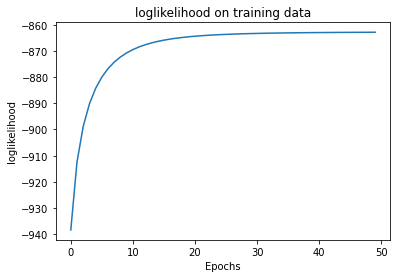

In [ ]:
bz = 50 #bathsize
lr = 0.01 #learning rate
lamda = 0 #regularization rate
k_max = 50 #max number of ephocs

result_1 = GAoptimizer(X_train,y_train,bz,lr,lamda,k_max,'w')
Logls_train_1 = result_1[1]

#Graph of loglikelihood on training data
plt.title("loglikelihood on training data")
plt.xlabel("Epochs")
plt.ylabel("loglikelihood")
xlist = range(len(Logls_train_1))
ylist = Logls_train_1
plt.plot(xlist,ylist)
plt.show()

Backward selection

In [ ]:
#Backward search
def backward_search(Xt,Yt,bz,lr,k_max):
  Cused = np.arange(Xt.shape[1])
  improvement = True
  while(improvement):
    gain_best = 0
    for c in Cused:
      Vused = Xt[:,Cused]
      Vused_wv = Xt[:,np.delete(Cused,np.where(Cused == c),axis=0)]

      #Model without v
      beta_wv = GAoptimizer(Vused_wv,Yt,bz,lr,0,k_max,'w')[0]
      logl_wv = Lcll(Vused_wv,Yt,beta_wv,0)

      #Model with v
      beta = GAoptimizer(Vused,Yt,bz,lr,0,k_max,'w')[0]
      logl = Lcll(Vused,Yt,beta,0)

      gain = AIC(logl,beta) - AIC(logl_wv,beta_wv)  #the sign before the expression is because we are minimizing the loss function

      if gain > gain_best:
        gain_best = gain
        c_best = c
      
    improvement = (gain_best > 0)
    if improvement:
      Cused = np.delete(Cused,np.where(Cused == c_best),axis=0)

  return Cused

In [ ]:
bz = 50 #bathsize
lr = 0.01 #learning rate
lamda = 0 #regularization rate
k_max = 50 #max number of ephocs
selected_features_i = backward_search(X_train,y_train,bz,lr,k_max)
print('Indices of selected features',selected_features_i,sep='\n')

[ 3  4 12 20 22 24 29 31 34 39 40 41 42 43 44 45 47 48 49 50]


Trained model with selected features from backward algorithm

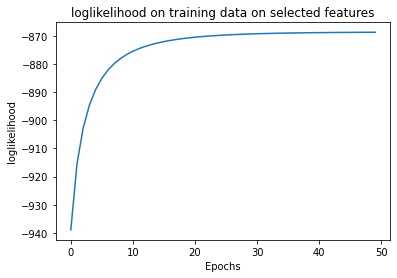

In [ ]:
X_train_bs = X_train[:,selected_features_i] #train data on selected features
bz = 50 #bathsize
lr = 0.01 #learning rate
lamda = 0 #regularization rate
k_max = 50 #max number of ephocs

result_2 = GAoptimizer(X_train_bs,y_train,bz,lr,lamda,k_max,'w')
theta_2 = result_2[0]
Logls_train_2 = result_2[1]

#Graph of loglikelihood on training data
plt.title("loglikelihood on training data on selected features")
plt.xlabel("Epochs")
plt.ylabel("loglikelihood")
xlist = range(len(Logls_train_2))
ylist = Logls_train_2
plt.plot(xlist,ylist)
plt.show()

Error on test set

In [ ]:
X_test_bs = X_test[:,selected_features_i]  #test data with selected features
lamda = 0
llog_test = Lcll(X_test_bs,y_test,theta_2,lamda)
ca_test = ca(X_test_bs,y_test,theta_2)
print('Loglikelihood on test data',llog_test)
print('Classification accuracy on test data',ca_test)

Loglikelihood on test data -235.53886888872927
Classification accuracy on test data 0.9005524861878453


Loglikeihood on test data turned out to being lower that on training data. Is that possible?

### Exercise 2: Regularization for Logistic Regression

Hyperparameter tuning is the is the problem of choosing a set of optimal hyperparameters for a learning algorithm

Grid of hyperparameters

In [ ]:
lrs = 10.0 ** np.arange(-1,-5,-1) #set of learning rates
lamdas = 10.0 ** np.arange(-2,-6,-1) #set of regulatization rates
grid = np.array(np.meshgrid(lrs,lamdas)).T.reshape(-1,2)
np.random.shuffle(grid)
print('Samples of the grid:',grid[:5],sep='\n')

Samples of the grid
[[1.e-03 1.e-04]
 [1.e-02 1.e-02]
 [1.e-03 1.e-05]
 [1.e-01 1.e-02]
 [1.e-01 1.e-03]]


k-fold cross-validation protocol for grid search

In [ ]:
#Auxiliary functions

#Data splitter
def crossval_split(X,y,K,k):
  N = X.shape[0]
  sup = int(N*(k+1)/K)
  inf = int(N*k/K)
  X_val = X[inf:sup] #validation data is taken from training data
  y_val = y[inf:sup]
  X_train = np.concatenate((X[:inf],X[sup:]))
  y_train = np.concatenate((y[:inf],y[sup:]))
  return X_train, y_train, X_val, y_val

#Average erros calculator
def crossval_loss(X,y,K,bz,lr,lamda,k_max):
  llog = np.zeros(K)
  CAcc = np.zeros(K)
  for k in range(K):
    X_tr, y_tr, X_val, y_val = crossval_split(X,y,K,k)
    theta = GAoptimizer(X_tr,y_tr,bz,lr,lamda,k_max,'w')[0]
    llog[k] = Lcll(X_val,y_val,theta,lamda)
    CAcc[k] = ca(X_val,y_val,theta)
  return llog,CAcc

#Hyperparameter selector (grid search)
def hp_tuning(grid,X,y,K,bz,k_max):
  hps = []
  for hp in grid:
    cv_loss = crossval_loss(X,y,K,bz,lr,lamda,k_max)
    cv_llog = cv_loss[0].mean()
    cv_ca = cv_loss[1].mean()
    hps.append([hp[0],hp[1],cv_llog,cv_ca])
  return np.array(hps),cv_loss[0],cv_loss[1]

In [ ]:
K = 5 #number of folds for cross-validation
bz = 50 #bathsize
k_max = 10 #max number of epochs

tunning_result = hp_tuning(grid,X_train_bs,y_train,K,bz,k_max)

hps = tunning_result[0] #Tested Hyperparameters
best_hps = max(hps, key=lambda hp: hp[2]) #Selected hyperparameters based on lower loglikehood on VALIDATION DATA

best_alpha = best_hps[0]
best_lamda = best_hps[1]
print('Hyperparameter selected using grid search:')
print('Best alpha:',best_alpha)
print('Best lamda:',best_lamda)

Hyperparameter selected using grid search:
Best alpha: 0.001
Best lamda: 0.0001


Plot of classification accuracy vs (alpha,lamda)

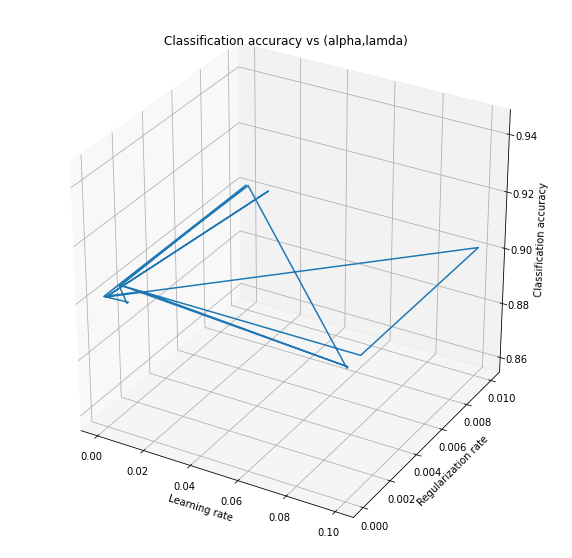

In [ ]:
#Slicing of the results obtained from hyperparameter tunning
xs = hps[:,0] #alphas
ys = hps[:,1] #lamdas
zs = hps[:,3] #classification accuracy on validation set
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d') #Add an axes to the current figure and make it the current axes
ax.set_title("Classification accuracy vs (alpha,lamda)")
ax.set_xlabel("Learning rate")
ax.set_ylabel("Regularization rate")
ax.set_zlabel("Classification accuracy")
ax.plot(xs,ys,zs)
plt.show()


Retraining of the model with found hyperparameters

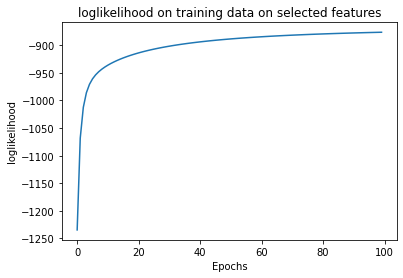

In [ ]:
#Hyperparameters
bz = 50 #bathsize
lr = best_alpha #learning rate
lamda = best_lamda #regularization rate
k_max = 100 #max number of epochs

#Model training
result_3 = GAoptimizer(X_train_bs,y_train,bz,lr,lamda,k_max,'w')
theta_3 = result_3[0]
Logls_train_3 = result_3[1]

#Graph of loglikelihood on training data with the best hyperparameters found on grid search
plt.title("loglikelihood on training data on selected features")
plt.xlabel("Epochs")
plt.ylabel("loglikelihood")
xlist = range(len(Logls_train_3))
ylist = Logls_train_3
plt.plot(xlist,ylist)
plt.show()

Error on test data

In [ ]:
lamda = best_lamda
llog_test = Lcll(X_test_bs,y_test,theta_3,lamda)
ca_test = ca(X_test_bs,y_test,theta_3)
print('Loglikelihood on test data',llog_test)
print('Classification accuracy on test data',ca_test)

Loglikelihood on test data -236.22515508541085
Classification accuracy on test data 0.901657458563536


Plot of Validation Accuracy and Log-likelihood metrics per k − fold iteration

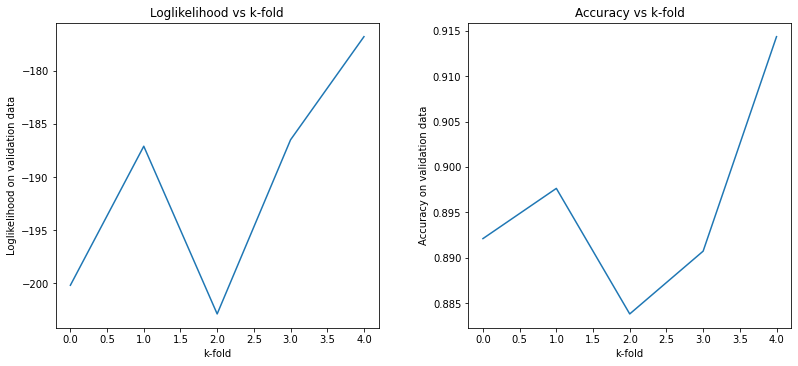

In [ ]:
llog = tunning_result[1]
CAcc = tunning_result[2]

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
#plot error vs i
ax1.set_title("Loglikelihood vs k-fold")
ax1.set_xlabel("k-fold")
ax1.set_ylabel("Loglikelihood on validation data")
xlist_1 = range(len(llog))
ylist_1 = llog
ax1.plot(xlist_1,ylist_1)

#plot logloss on test vs i
ax2.set_title("Accuracy vs k-fold")
ax2.set_xlabel("k-fold")
ax2.set_ylabel("Accuracy on validation data")
xlist_2 = range(len(CAcc))
ylist_2 = CAcc
ax2.plot(xlist_2,ylist_2)

fig.set_figheight(6)
fig.set_figwidth(12)

plt.tight_layout(pad=4)
plt.show()

### Exercise 3: Implementing Hyperband for Logistic Regression

Resplit of the data

In [ ]:
np.random.seed(3116) #to set the pseudo ramdom number generator

N, M = bank_dumm.shape
ridx = np.random.permutation(N) #to assure a uniform distribution of the instances in both the training and the data sets

ratio1 = 0.7 #percentage of the data used for training the model
ratio2 = 0.15 #percentage of the data used for validation
split1 = int(N*ratio1)
split2 = int(N*(ratio1+ratio2))
data_Train = bank_dumm.iloc[ridx[:split1]]
data_Valid = bank_dumm.iloc[ridx[split1:split2]]
data_Test = bank_dumm.iloc[ridx[split2:]]

print(data_Train['y'].value_counts())
print(data_Valid['y'].value_counts())
print(data_Test['y'].value_counts())

output = 'y'
X_Train = data_Train.drop(output,axis=1).to_numpy()
y_Train = data_Train[output].to_numpy().reshape(-1,1)
X_Valid = data_Valid.drop(output,axis=1).to_numpy()
y_Valid = data_Valid[output].to_numpy().reshape(-1,1)
X_Test = data_Test.drop(output,axis=1).to_numpy()
y_Test = data_Test[output].to_numpy().reshape(-1,1)

print(X_Train.shape)
print(X_Valid.shape)
print(X_Test.shape)

0    2796
1     368
Name: y, dtype: int64
0    600
1     78
Name: y, dtype: int64
0    604
1     75
Name: y, dtype: int64
(3164, 51)
(678, 51)
(679, 51)


Hyperparameter grid

In [ ]:
#Hyperparameter grid
np.random.seed(3116)
lrs = 10.0 ** np.arange(-2,-6,-1) #learning rates
lamdas = 10.0 ** np.arange(-2,-7,-1) #regularization rates
bzs = np.arange(10,50,10) #bath-sizes
szcs = np.array(['bd','bt','w']) #step controller algorithms. Reference: bd(bolddriver), bt(backtracking), w(without stepcontroller)
grid = np.array(np.meshgrid(bzs,lrs,lamdas,szcs),dtype='O').T.reshape(-1,4) #grid of hyperparameters
np.random.shuffle(grid)
print('Number of configurations',len(grid))
print('Samples of the grid:',grid[:5],sep='\n')

Number of configurations 240
Samples of the grid:
[[10 0.01 0.01 'bt']
 [30 0.001 0.001 'w']
 [20 0.0001 0.01 'bt']
 [10 1e-05 0.001 'bt']
 [30 0.001 0.01 'bt']]


Hyperband algorithm

In [ ]:
#HYPERBAND function
def hyperband(X_tr,y_tr,X_val,y_val,grid,R,eta):
  s_max = int(np.floor(np.log(R)/np.log(eta)))
  B = (s_max+1)*R
  hps_s = []
  for s in range(s_max,0,-1):
    n = int(np.ceil(B/R*(eta**s/(s+1))))
    r = R/(eta**s)
    #Successivehalving (bracket)
    T = get_hyperparameter_configuration(grid,n)
    for i in range(s):
      n_i = np.floor(n/(eta**i))
      r_i = r*eta**i
      L = run_then_return_val_loss(X_tr,y_tr,X_val,y_val,T,r_i)
      T = top_k(L,int(np.floor(n_i/eta)))
    hps_s.append(T[0])
  return max(hps_s, key=lambda hp: hp[-1])

In [ ]:
#Auxiliary functions
#Hyperparameters selector
def get_hyperparameter_configuration(grid,n):
  np.random.seed(3116)
  return grid[np.random.randint(grid.shape[0], size=n), :]
#Loglikelihood calculator
def run_then_return_val_loss(X_tr,y_tr,X_val,y_val,T,r_i):
  L = []
  k_max = int(np.floor(r_i))
  for hps in T:
    theta = GAoptimizer(X_tr,y_tr,hps[0],hps[1],hps[2],k_max,hps[3])[0]
    Llog = Lcll(X_val,y_val,theta,hps[2])
    L.append([hps[0],hps[1],hps[2],hps[3],Llog])
  return L
#Top k selector
def top_k(L,k): 
  L.sort(reverse=True, key=lambda l: l[4])
  return L[:k]

In [ ]:
R = 100 #maximum amount of epochs that can be allocated to a single configuration
eta = 3 #proportion of configurations discarded in each bracket
best_hps = hyperband(X_Train,y_Train,X_Valid,y_Valid,grid,R,eta)
print('Selected hyperparameters by Hyperband:',best_hps[:4],sep='\n')

Selected hyperparameters by Hyperband:
[30, 0.01, 1e-05, 'w']


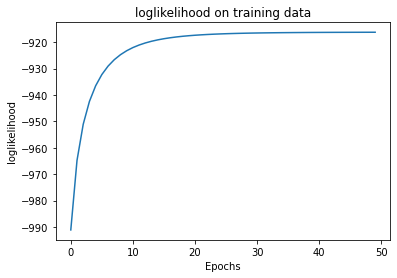

In [ ]:
bz = best_hps[0] #selected bathsize
lr = best_hps[1] #selected learning rate
lamda = best_hps[2] #selected regularization rate
stepController = best_hps[3] #selected regularization rate
k_max = 50 #max number of epochs

#Model training
result_4 = GAoptimizer(np.concatenate((X_Train,X_Valid)),np.concatenate((y_Train,y_Valid)),bz,lr,lamda,k_max,stepController)
theta_4 = result_4[0]
Logls_train_4 = result_4[1]

#Graph of loglikelihood on training data with the best hyperparameters found on grid search
plt.title("loglikelihood on training data")
plt.xlabel("Epochs")
plt.ylabel("loglikelihood")
xlist = range(len(Logls_train_4))
ylist = Logls_train_4
plt.plot(xlist,ylist)
plt.show()

Error on test data

In [ ]:
lamda = best_hps[2]
llog_test = Lcll(X_Test,y_Test,theta_4,lamda)
ca_test = ca(X_Test,y_Test,theta_4)
print('Loglikelihood on test data',llog_test)
print('Classification accuracy on test data',ca_test)

Loglikelihood on test data -179.71031921955048
Classification accuracy on test data 0.8998527245949927


Loglikehood on test data with hyperband selected hyperparameters is lower than loglikehood on test data with hand selected hyperparameters. However, the classification accuracy is almost the same.